In [ ]:
import os
import sys
import json
from pathlib import Path
sys.path.append(os.path.abspath('../..'))
sys.path.append(os.path.abspath('../../../external/Real-ESRGAN'))

# ----------- local imports ----------- 
from utils import show_images, make_grid
from constants import TRAIN_PATH, TRAIN_JSON_PATH, MODELS_SAVE_PATH, BASE_DIR
from FashionDataset import FashionDataset, BottomCenterCrop
from gfpgan import GFPGANer

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from basicsr.archs.rrdbnet_arch import RRDBNet

In [54]:
img = Image.open(BASE_DIR / "output/mo_sala.jpg")
w, h = img.size
w = w // 2

src_img = Image.open((BASE_DIR / "mo_salah.jpg")).resize((w, h), Image.BICUBIC)
sd_output = np.array(img)[:,w:,:]

src_sd_output = np.concatenate([src_img, sd_output], axis=1) 

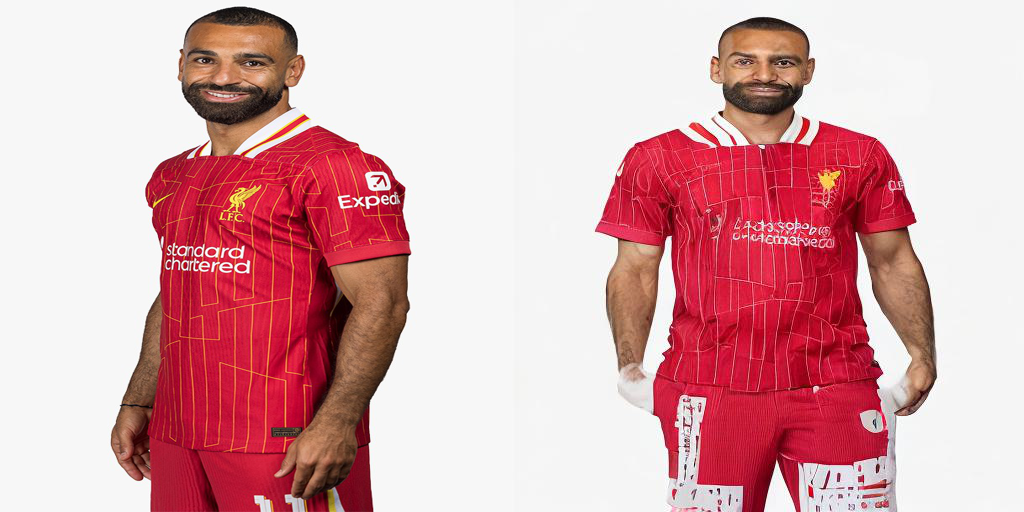

In [55]:
Image.fromarray(src_sd_output)

need small fix in basicsr 

line 8 in basicsr/data/degradations.py

```
from torchvision.transforms.functional import rgb_to_grayscale
```

------
external/Real-ESRGAN/realesrgan/__init__.py

remove ```from .version import *```

In [4]:
from realesrgan import RealESRGANer
from realesrgan.archs.srvgg_arch import SRVGGNetCompact
from gfpgan import GFPGANer

In [5]:
netscale = 4
model_path = str(MODELS_SAVE_PATH / "upscaler" / "RealESRGAN_x4plus.pth")


model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)

In [6]:
upsampler = RealESRGANer(
        scale=netscale,
        model_path=model_path,
        model=model,
        # half=not args.fp32,
        gpu_id=0
)

face_enhancer = GFPGANer(
        model_path= str(MODELS_SAVE_PATH / 'face_restoration/GFPGANv1.3.pth'),
        # upscale=args.outscale,
        arch='clean',
        channel_multiplier=2,
        bg_upsampler=upsampler
)

/home/aliaagheis/projects/Ad-Image-Generation/external/Real-ESRGAN/realesrgan/utils.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loadnet = torch.load(model_path, map

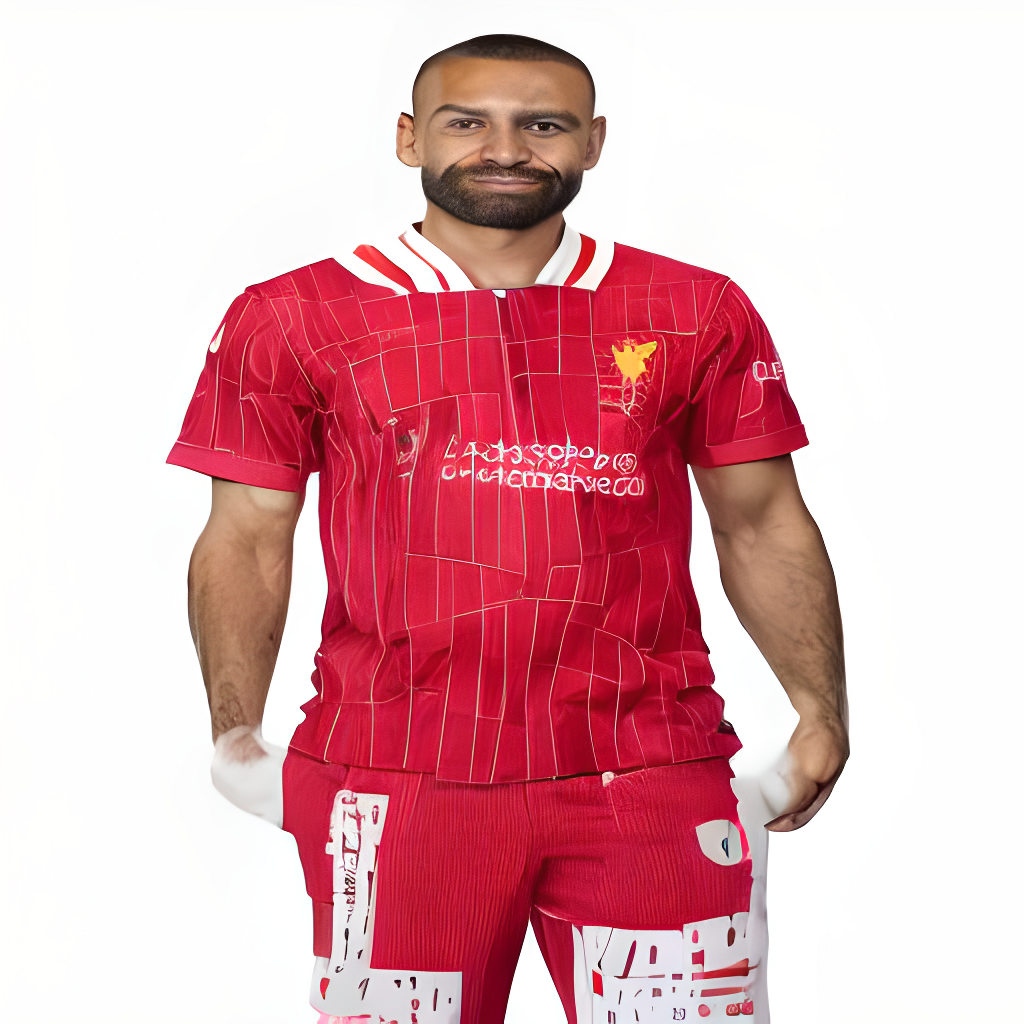

In [56]:
_, _, output = face_enhancer.enhance(sd_output, has_aligned=False, only_center_face=False, paste_back=True)
Image.fromarray(output)

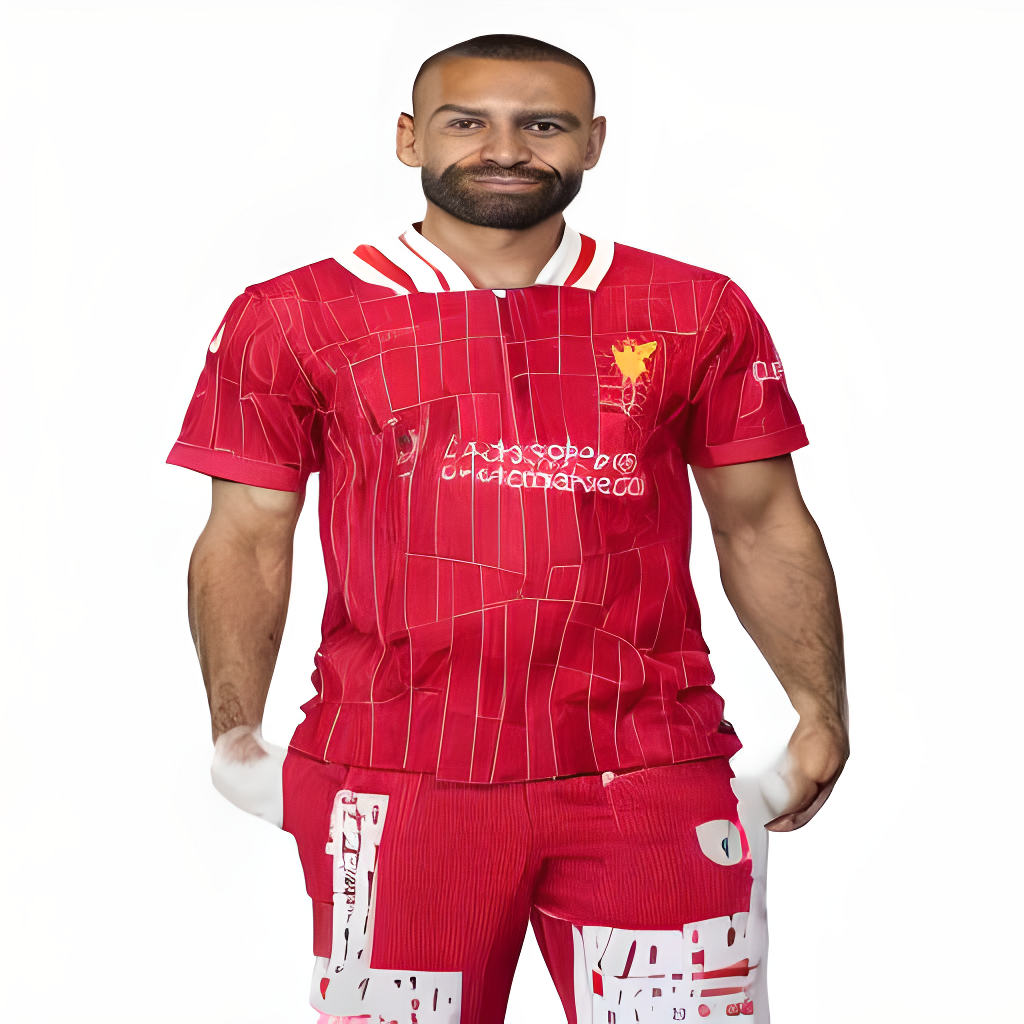